<a href="https://colab.research.google.com/github/phuclhp1922/VGU-AI_Lab-Dr.Cuong/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Allow Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/Basic/AI VIET NAM/Softmax Regression/creditcard.csv"
df = pd.read_csv(dataset_path)

In [ ]:
# View dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Seperate features with target
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [ ]:
# Add bias
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
# One-hot encoding
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [ ]:
# Divide train, test, and val set
val_size = 0.2
test_size = 0.125
random_state = 2

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=True)

In [ ]:
# Standardize
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[: , 1:])
X_val[:, 1:] = normalizer.transform(X_val[: , 1:])
X_test[:, 1:] = normalizer.transform(X_test[: , 1:])

In [ ]:
# Define commonly used function
def softmax(z):
  exp_z = np.exp(z)

  return exp_z / exp_z.sum(axis=1)[:, None]

def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)
  return y_hat

def compute_loss(y_hat, y):
  n = y.size

  return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

  return acc

In [ ]:
# Hyper-parameter
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
# Train model
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)
    train_batch_losses.append(train_loss)

    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(train_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses)/ len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print (f'\ nEPOCH { epoch + 1}:\ Training loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')

\ nEPOCH 1:\ Training loss : 0.300	Validation loss : 0.300
\ nEPOCH 2:\ Training loss : 0.176	Validation loss : 0.176
\ nEPOCH 3:\ Training loss : 0.115	Validation loss : 0.115
\ nEPOCH 4:\ Training loss : 0.081	Validation loss : 0.081
\ nEPOCH 5:\ Training loss : 0.062	Validation loss : 0.062
\ nEPOCH 6:\ Training loss : 0.049	Validation loss : 0.049
\ nEPOCH 7:\ Training loss : 0.041	Validation loss : 0.041
\ nEPOCH 8:\ Training loss : 0.035	Validation loss : 0.035
\ nEPOCH 9:\ Training loss : 0.031	Validation loss : 0.031
\ nEPOCH 10:\ Training loss : 0.028	Validation loss : 0.028
\ nEPOCH 11:\ Training loss : 0.025	Validation loss : 0.025
\ nEPOCH 12:\ Training loss : 0.023	Validation loss : 0.023
\ nEPOCH 13:\ Training loss : 0.021	Validation loss : 0.021
\ nEPOCH 14:\ Training loss : 0.020	Validation loss : 0.020
\ nEPOCH 15:\ Training loss : 0.019	Validation loss : 0.019
\ nEPOCH 16:\ Training loss : 0.017	Validation loss : 0.017
\ nEPOCH 17:\ Training loss : 0.017	Validation lo

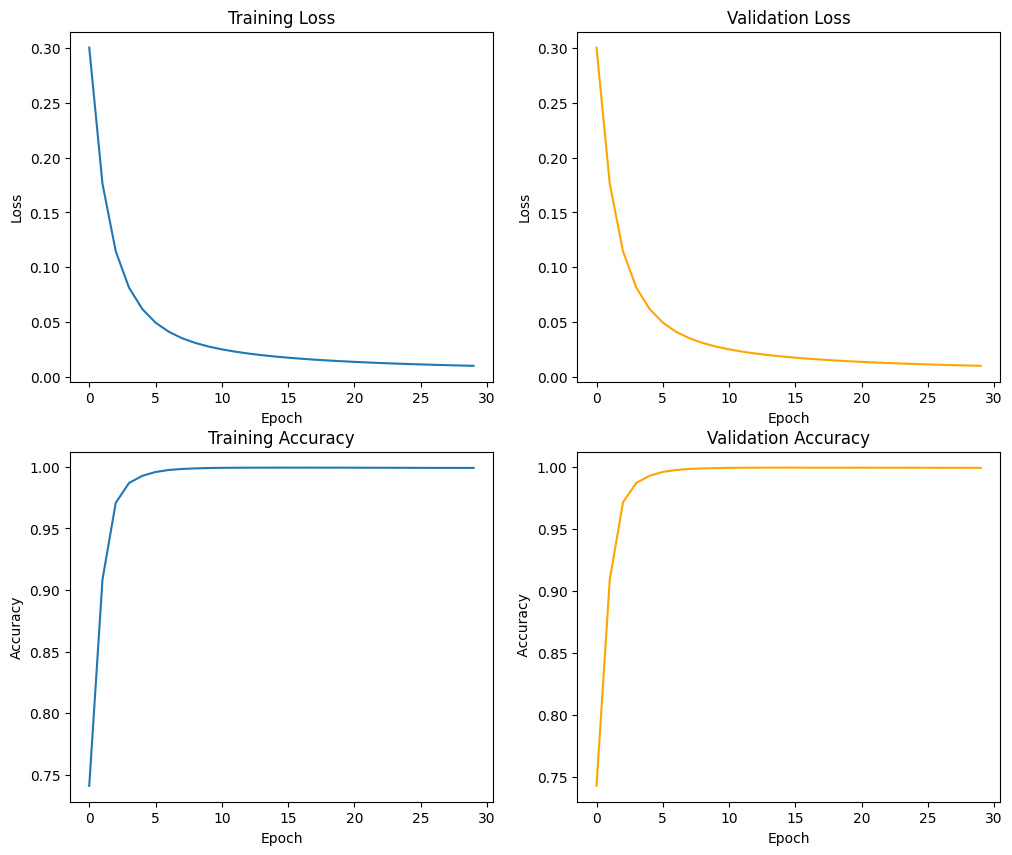

In [ ]:
# Plot train + val loss and accuracy
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel=' Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy : 0.9993153330290369
Accuracy : 0.9992275552122467
